In [50]:
#importing libraries
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable 
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
import torch.nn.functional as F


In [ ]:
# to load the Fashion-MNIST dataset

transform = transforms.Compose([transforms.ToTensor(),
  transforms.Normalize((0.5,), (0.5,))
])

# Downloading the  training data
trainset = datasets.FashionMNIST('MNIST_data/', download = True, train = True, transform = transform) #train set
testset = datasets.FashionMNIST('MNIST_data/', download = True, train = False, transform = transform) #test set
train_loader = torch.utils.data.DataLoader(trainset, batch_size = 512, shuffle = True)
test_loader = torch.utils.data.DataLoader(testset, batch_size = 512, shuffle = True)

device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')


In [ ]:
#creating a model
model = nn.Sequential(
        #reference: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

        nn.Conv2d(1,12,3), # first Layer , use a kernel size of 3x3 and use 12 filters
        nn.ReLU(),
        nn.Conv2d(12,12,6,stride=2),  # second  Layer, kernel size of 6x6 with 12 filters and a stride size of 2
        nn.ReLU(),
        nn.Conv2d(12,32,6,stride=2), # third  Layer , kernel size of 6x6 with 32 filters and a stride size of 2
        nn.ReLU(),
        nn.Flatten(),  # flatten the output of the third convolutional layer 
# nn.LogSoftmax(dim = 1)
        nn.Linear(288,64), # fully connected output layer with softmax activation
        nn.Linear(64,10))  # fully connected output layer with softmax activation

        
    


In [ ]:

epochs = 30 #Number of epochs 

train_loss, train_accuracy, test_loss, test_accuracy   = [], [], [], [] #  empty lists 

model = model.to(device) # Loading Model 

crossentropy = nn.CrossEntropyLoss() #  Cross Entropy Loss

optimizer = torch.optim.Adam(model.parameters(),lr=0.0003)

for e in range(epochs):
    running_loss = 0
    running_accuracy = 0
    
    for i,(images,labels) in enumerate(train_loader):
        images = Variable(images).to(device)
        labels = Variable(labels).to(device)
        
        optimizer.zero_grad()
        result = model(images)
        loss = crossentropy(result,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.data
        running_accuracy += (torch.max(result.data,1)[1] == labels.data).sum()
        
        print('\rEpoch'+str(e+1), "Loss:",loss.data/len(images),end='')
        
    train_loss += [(running_loss/len(train_loader)).cpu().detach().numpy()]
    train_accuracy += [(running_accuracy/len(train_loader.dataset)).cpu().detach().numpy()]
    print('\tTrain:',train_loss[-1],train_accuracy[-1],end='')

    running_loss = 0
    running_accuracy = 0
    for i, (images,labels) in enumerate(test_loader):
        images = Variable(images).to(device)
        labels = Variable(labels).to(device)
                
        result = model(images)
        running_loss += crossentropy(result,labels).data
        running_accuracy += (torch.max(result.data,1)[1] == labels.data).sum()
                
    test_loss += [running_loss.cpu().detach().numpy()]
    test_accuracy += [(running_accuracy/len(test_loader.dataset)).cpu().detach().numpy()]
    print("\tValidation: ",test_loss[-1],test_accuracy[-1])
    
    


Epoch1 Loss: tensor(0.0074)	Train: 1.2522618 0.57061666	Validation:  14.664936 0.726
Epoch2 Loss: tensor(0.0076)	Train: 0.6507407 0.7540333	Validation:  12.523011 0.7654
Epoch3 Loss: tensor(0.0069)	Train: 0.58472687 0.7780667	Validation:  11.888547 0.7744
Epoch4 Loss: tensor(0.0054)	Train: 0.5448923 0.79465	Validation:  11.056385 0.7942
Epoch5 Loss: tensor(0.0038)	Train: 0.50941724 0.81053334	Validation:  10.583049 0.8039
Epoch6 Loss: tensor(0.0040)	Train: 0.48536408 0.8208167	Validation:  10.088251 0.8136
Epoch7 Loss: tensor(0.0038)	Train: 0.46099612 0.8319333	Validation:  9.72425 0.8229
Epoch8 Loss: tensor(0.0057)	Train: 0.44444698 0.83865	Validation:  9.444216 0.8288
Epoch9 Loss: tensor(0.0044)	Train: 0.42664024 0.84615	Validation:  9.14436 0.8335
Epoch10 Loss: tensor(0.0049)	Train: 0.41145363 0.8522	Validation:  8.681406 0.8426
Epoch11 Loss: tensor(0.0036)	Train: 0.39910614 0.85573334	Validation:  8.461127 0.8491
Epoch12 Loss: tensor(0.0044)	Train: 0.3864034 0.8606333	Validation:  

In [ ]:
# A. show the network diagram
model.eval()


Sequential(
  (0): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(12, 12, kernel_size=(6, 6), stride=(2, 2))
  (3): ReLU()
  (4): Conv2d(12, 32, kernel_size=(6, 6), stride=(2, 2))
  (5): ReLU()
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=288, out_features=64, bias=True)
  (8): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
#B.	Note the number of trainable parameters for this network

parameters = sum(p.numel() for p in model.parameters())
print('"',parameters, ' is the total number of parameters "')

" 38318  is the total number of parameters "


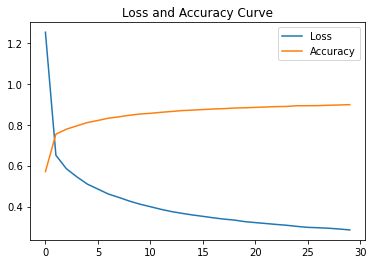

In [ ]:
#C.	Describe the accuracy you obtain and show the loss/ accuracy curves.  

#plotting the loss and accuracy curve
plt.plot(train_loss,label="Loss")
plt.plot(train_accuracy,label="Accuracy")
plt.title("Loss and Accuracy Curve")
plt.legend()
plt.show()

#D.	Do you observe any overfitting? Apply Dropout with CNN to see the effect of regularization? Report your results. 





In [ ]:
#creating a model
model = nn.Sequential(
        #reference: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

        nn.Conv2d(1,12,3), # first Layer , use a kernel size of 3x3 and use 12 filters
        nn.ReLU(),
        nn.Conv2d(12,12,6,stride=2),  # second  Layer, kernel size of 6x6 with 12 filters and a stride size of 2
        nn.ReLU(),
        nn.Conv2d(12,32,6,stride=2), # third  Layer , kernel size of 6x6 with 32 filters and a stride size of 2
        nn.ReLU(),
        nn.Flatten(),  # flatten the output of the third convolutional layer 

        nn.Dropout(0.7), #dropout layer for section D

        nn.Linear(288,64), # fully connected output layer with softmax activation
        nn.Linear(64,10))  # fully connected output layer with softmax activation

     
epochs = 30 #Number of epochs 

train_loss, train_accuracy, test_loss, test_accuracy   = [], [], [], [] #  empty lists 

model = model.to(device) # Loading Model 

crossentropy = nn.CrossEntropyLoss() #  Cross Entropy Loss

optimizer = torch.optim.Adam(model.parameters(),lr=0.0003)

for e in range(epochs):
    running_loss = 0
    running_accuracy = 0
    
    for i,(images,labels) in enumerate(train_loader):
        images = Variable(images).to(device)
        labels = Variable(labels).to(device)
        
        optimizer.zero_grad()
        result = model(images)
        loss = crossentropy(result,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.data
        running_accuracy += (torch.max(result.data,1)[1] == labels.data).sum()
        
        print('\rEpoch'+str(e+1), "Loss:",loss.data/len(images),end='')
        
    train_loss += [(running_loss/len(train_loader)).cpu().detach().numpy()]
    train_accuracy += [(running_accuracy/len(train_loader.dataset)).cpu().detach().numpy()]
    print('\tTrain:',train_loss[-1],train_accuracy[-1],end='')

    running_loss = 0
    running_accuracy = 0
    for i, (images,labels) in enumerate(test_loader):
        images = Variable(images).to(device)
        labels = Variable(labels).to(device)
                
        result = model(images)
        running_loss += crossentropy(result,labels).data
        running_accuracy += (torch.max(result.data,1)[1] == labels.data).sum()
                
    test_loss += [running_loss.cpu().detach().numpy()]
    test_accuracy += [(running_accuracy/len(test_loader.dataset)).cpu().detach().numpy()]
    print("\tValidation: ",test_loss[-1],test_accuracy[-1])
    


Epoch1 Loss: tensor(0.0108)	Train: 1.4052205 0.5032333	Validation:  17.674986 0.6706
Epoch2 Loss: tensor(0.0078)	Train: 0.78897274 0.7072167	Validation:  15.264779 0.714
Epoch3 Loss: tensor(0.0063)	Train: 0.7097282 0.73285	Validation:  14.169639 0.7363
Epoch4 Loss: tensor(0.0044)	Train: 0.66794795 0.7484	Validation:  13.619994 0.7438
Epoch5 Loss: tensor(0.0062)	Train: 0.64246196 0.75808334	Validation:  12.973834 0.7572
Epoch6 Loss: tensor(0.0061)	Train: 0.61823446 0.7677	Validation:  12.657383 0.7641
Epoch7 Loss: tensor(0.0062)	Train: 0.59786904 0.7754833	Validation:  12.249689 0.7736
Epoch8 Loss: tensor(0.0066)	Train: 0.5897605 0.7794	Validation:  12.081156 0.7753
Epoch9 Loss: tensor(0.0057)	Train: 0.57600117 0.7843	Validation:  11.974434 0.7811
Epoch10 Loss: tensor(0.0068)	Train: 0.563675 0.79143333	Validation:  11.630121 0.786
Epoch11 Loss: tensor(0.0038)	Train: 0.5534555 0.7948167	Validation:  11.459751 0.7902
Epoch12 Loss: tensor(0.0054)	Train: 0.54447585 0.79753333	Validation:  1

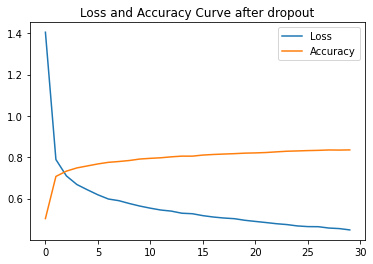

In [ ]:
#plotting the loss and accuracy curve after dropout
plt.plot(train_loss,label="Loss")
plt.plot(train_accuracy,label="Accuracy")
plt.title("Loss and Accuracy Curve after dropout")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


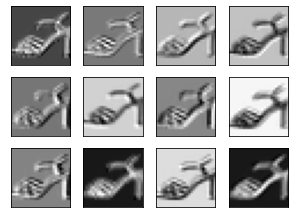

In [ ]:
#E. visualize the filter outputs of the first layer of your CNN model 
rows = 4 
columns = 4
fig = plt.figure(figsize=(5,5)) 

for i,(items,classes) in enumerate(test_loader):


    image = items.to('cpu')
    image = image[0]
    result = model(image)

    for i in range(1,13):
        f = result[i-1].detach().numpy()
        fig = plt.subplot(rows,columns,i) 
        fig.set_xticks([]) 
        fig.set_yticks([]) 
        plt.imshow(f,cmap='gray')
        
plt.show()



In both questions, question 1 and 2, we have used CNN and MLP for image classification using the fashion mnist dataset. However, CNN is capable of learning the feature vector straight from the training character image without the need for any hand-crafting. CNN has Convolutional Layer, Pooling Layer and Fully Connected Layer. At the convolutional Layer, the kernel(collection of weight) will scan input data with particular stride(moving step). Therefore, CNN cis able to understand spatial relations. MLP is made up of completely connected layers that are linked to one another. n the code above, we can plainly see that CNN converges quicker than MLP in terms of epochs. However, as compared to the MLP code, each epoch in CNN takes longer. since the number of parameters in CNN exceeds that of MLP. Accuracy between 0.6 till 0.8 MLP, which Accuracy between 0.4 till 0.8 for CNN. However the loss is the same.